In [ ]:
# steps 1 :- we will collect the stock data -- AAPL
# steps 2 :- preprocess the data- Train and Test--
# steps 3 :- create an stacked lstm model
# steps 4 :- predict the test data and plot the output
# steps 5 :- predict the future 30 days and plot the output

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [10]:
df1 = df.reset_index()['close']

In [11]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [12]:
df1.shape

(1258,)

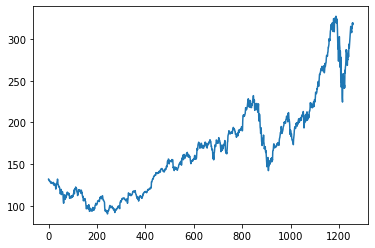

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
### lstm are sensible to scale of data

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
#     lets understand with the help of the following steps:-
#     there is a time series data so in this data always the forward data depend on previous data
#     120, 130, 125, 140, 134, 150 ||||, 160, 190, 154
    
#     in time series data we first split and then preprocessing the data
#     timeseries data--> train-> 120, 130, 125, 140, 134, 150 test--> 160,190,154

In [18]:
#split dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [20]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

<!-- # now for preprocessing we should create a dataset in which features of trainning and test data are from timestamps -->
like for train--> 120,130,125,140,134,150.  test--> 160,190,154

120,130,125,140,134,150
timestamp = 3

    X_train.      y_train
f1    f2     f3     o/p
120.  130.  125.    140
130.  125.  140.    134

it is a sample dataset that we have to create using both train and test dataset

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [32]:
X_train.shape

(716, 100)

In [33]:
X_test.shape

(340, 100)

In [35]:
# create a lstm model for this we first make a input 3-dimensions now lets reshape our data[samples, time_stamps, features]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [44]:
#create the stacked lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [79]:
# model = Sequential()
# model.add(LSTM(50,input_shape=(100,1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (100, 1)))

model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(units = 50))

model.add(Dense(units = 1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2022-08-08 16:52:49.399602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:49.741912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:49.882037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:50.065980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:50.198687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:50.349407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:50.614722: I tensorflow/core/grappler/optimizers/cust

12/12 [==============================] - ETA: 0s - loss: 0.0229

2022-08-08 16:52:54.005513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:54.124188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:54.243522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:54.367183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:52:54.486027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 8s 345ms/step - loss: 0.0229 - val_loss: 0.1063
Epoch 2/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0058 - val_loss: 0.0133
Epoch 3/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0016 - val_loss: 0.0054
Epoch 4/100
12/12 [==============================] - 1s 100ms/step - loss: 9.4793e-04 - val_loss: 0.0083
Epoch 5/100
12/12 [==============================] - 1s 99ms/step - loss: 8.5815e-04 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 1s 98ms/step - loss: 8.3837e-04 - val_loss: 0.0057
Epoch 7/100
12/12 [==============================] - 1s 99ms/step - loss: 9.0970e-04 - val_loss: 0.0066
Epoch 8/100
12/12 [==============================] - 1s 99ms/step - loss: 8.5645e-04 - val_loss: 0.0068
Epoch 9/100
12/12 [==============================] - 1s 99ms/step - loss: 8.2225e-04 - val_loss: 0.0075
Epoch 10/100
12/12 [==============================] - 1s 99ms/step - loss: 8.5111e-04

12/12 [==============================] - 1s 102ms/step - loss: 2.4233e-04 - val_loss: 0.0021
Epoch 79/100
12/12 [==============================] - 1s 101ms/step - loss: 2.2244e-04 - val_loss: 0.0022
Epoch 80/100
12/12 [==============================] - 1s 101ms/step - loss: 2.2555e-04 - val_loss: 0.0024
Epoch 81/100
12/12 [==============================] - 1s 102ms/step - loss: 2.3653e-04 - val_loss: 0.0025
Epoch 82/100
12/12 [==============================] - 1s 102ms/step - loss: 2.1690e-04 - val_loss: 0.0022
Epoch 83/100
12/12 [==============================] - 1s 102ms/step - loss: 2.1186e-04 - val_loss: 0.0021
Epoch 84/100
12/12 [==============================] - 1s 101ms/step - loss: 2.1965e-04 - val_loss: 0.0022
Epoch 85/100
12/12 [==============================] - 1s 102ms/step - loss: 2.0135e-04 - val_loss: 0.0021
Epoch 86/100
12/12 [==============================] - 1s 103ms/step - loss: 1.9527e-04 - val_loss: 0.0022
Epoch 87/100
12/12 [==============================] - 1s 10

In [82]:
##lets do the prediction and check performance matrix
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2022-08-08 16:56:21.391706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:56:21.508602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:56:21.631745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-08 16:56:21.773623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 23s

2022-08-08 16:56:21.894280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 78ms/step


In [83]:
##transformance to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Train Score: 140.20 RMSE
Test Score: 236.16 RMSE


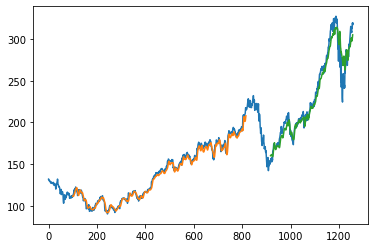

In [84]:
import math
from sklearn.metrics import mean_squared_error
look_back = 100
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train, train_predict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test, test_predict))
print('Test Score: %.2f RMSE' % (testScore))
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [85]:
#now for the next 30 days

In [86]:
len(test_data)


441

In [87]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [88]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [90]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.91762692 0.90777373
 0.89243609 0.87963343 0.87279516 0.87208188 0.87608135 0.88276434
 0.89002353 0.89606369 0.89971089 0.90056008 0.89895284 0.89577931
 0.89217168 0.8891874  0.88757432 0.88765436 0.8893

10 day output [[0.90824604]]
11 day input [0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.91762692
 0.90777373 0.89243609 0.87963343 0.87279516 0.87208188 0.87608135
 0.88276434 0.89002353 0.89606369 0.89971089 0.90056008 0.89895284
 0.89577931 0.89217168 0.8891874  0.88757432 0.88765436 0.88932705
 0.89215559 0.8955276  0.89881051 0.90149158 0.90326339 0.90406454
 0.90405661 0.903545

18 day output [[0.91028345]]
19 day input [0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.91762692 0.90777373 0.89243609
 0.87963343 0.87279516 0.87208188 0.87608135 0.88276434 0.89002353
 0.89606369 0.89971089 0.90056008 0.89895284 0.89577931 0.89217168
 0.8891874  0.88757432 0.88765436 0.88932705 0.89215559 0.8955276
 0.89881051 0.90149158 0.90326339 0.90406454 0.90405661 0.9035455
 0.90289098 0.90241116 0.90232217 0.90270227 0.90350598 0.9045893
 0.9057641  0.90684211 0.90

26 day output [[0.9112831]]
27 day input [0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.91762692 0.90777373 0.89243609 0.87963343 0.87279516
 0.87208188 0.87608135 0.88276434 0.89002353 0.89606369 0.89971089
 0.90056008 0.89895284 0.89577931 0.89217168 0.8891874  0.88757432
 0.88765436 0.88932705 0.89215559 0.8955276  0.89881051 0.90149158
 0.90326339 0.90406454 0.90405661 0.9035455  0.90289098 0.90241116
 0.90232217 0.90270227 0.90350598 0.9045893  0.9057641  0.90684211
 0.90768588 0.90822691 0.90847266 0.90848863 0.90837377 0.90824604
 0.90819144 0.90825695 0

In [91]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [92]:
import matplotlib.pyplot as plt

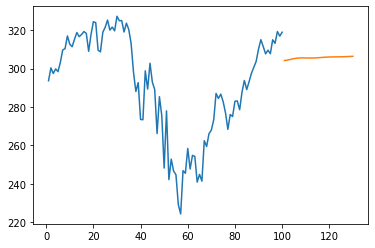

In [93]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

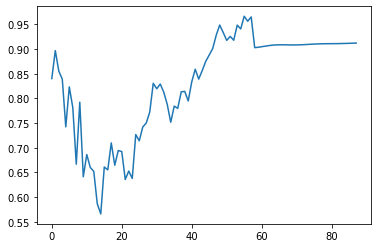

In [94]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])